## CNN-1D implementation for CyberBullying text classification problem using sentiment analysis.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Embedding
from keras import Sequential
from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import load_model
import matplotlib.pyplot as plt

### Recap about preprocessing step -  


*   As we can not use text directly for classification, we have created word embeddings. We created embeddings after cleaning and stemming.
*   We have used following word embeddings - 
    1. Bag of words
    2. Tf-idf (Term Frequency-Inverse Document Frequency)
    3. GloVe word embedding
    4. Word2vec embedding
*   We have saved these embeddings in preprocessing step and will be using here.
*   We have also encoded vectors for output labels.








Loading Embeddings - 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**For BAG OF WORDS** -

In [3]:
X_train_bows = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/X_train_bow.pkl')
y_train_bows = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/y_train_bow.pkl')
X_test_bows = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/X_test_bow.pkl')
y_test_bows = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/y_test_bow.pkl')

In [4]:
print(X_train_bows.shape,y_train_bows.shape,X_test_bows.shape,y_test_bows.shape)

(37791, 500) (37791, 1) (9448, 500) (9448, 1)


**For TF-idf -**

In [5]:
X_train_tfs = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/X_train_tf.pkl')
y_train_tfs = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/y_train_tf.pkl')
X_test_tfs = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/X_test_tf.pkl')
y_test_tfs = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/y_test_tf.pkl')

In [6]:
print(X_train_tfs.shape,y_train_tfs.shape,X_test_tfs.shape,y_test_tfs.shape)

(37791, 500) (37791, 1) (9448, 500) (9448, 1)


**For Glove** -

In [7]:
X_train_gloves = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/X_train_glove.pkl')
y_train_gloves = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/y_train_glove.pkl')
X_test_gloves = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/X_test_glove.pkl')
y_test_gloves = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/y_test_glove.pkl')

In [8]:
print(X_train_gloves.shape,y_train_gloves.shape,X_test_gloves.shape,y_test_gloves.shape)

(37791, 500) (37791,) (9448, 500) (9448,)


**For Word2Vector embedding -**

In [9]:
X_train_w2vs = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/X_train_w2v.pkl')
y_train_w2vs = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/y_train_w2v.pkl')
X_test_w2vs = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/X_test_w2v.pkl')
y_test_w2vs = pd.read_pickle('/content/gdrive/My Drive/Saved_embeddings forCyberBullying/y_test_w2v.pkl')

In [10]:
print(X_train_w2vs.shape,y_train_w2vs.shape,X_test_w2vs.shape,y_test_w2vs.shape)

(37791, 100) (37791, 1) (9448, 100) (9448, 1)


## CNN-1D

CNN - MODEL 

In [11]:
def MyCNN(input_size):
  model = Sequential();
  #--------- Layer 2 (After input layer) ----
  model.add(Conv1D(32,2,activation = 'relu',padding = 'same', input_shape=(input_size,1)));
  model.add(MaxPooling1D(5,padding = 'same'));
  # -----------Layer 3-----------------
  model.add(Conv1D(64,3,activation = 'relu',padding = 'same'));
  model.add(MaxPooling1D(5,padding = 'same'));
  # -----------Layer 4-----------------
  model.add(Conv1D(64,4,activation = 'relu',padding = 'same'));
  model.add(MaxPooling1D(10,padding = 'same'));
  #---------Flattening -------------
  model.add(Flatten());
  #---------Dense layers and Dropouts-------------------
  model.add(Dropout(0.25))
  model.add(Dense(32, activation='relu'));
  model.add(Dropout(0.25))
  model.add(Dense(6, activation='softmax'));
  #for loss
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model;


Model Summary -

In [12]:
MyCNN(500).summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 500, 32)           96        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 100, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 20, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 20, 64)            16448     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2, 64)            0

In [13]:
def one_hot(y_train):
  onehot_encoder = OneHotEncoder(sparse=False)
  yy = np.asarray(y_train);
  yy = yy.reshape(len(yy),1);
  yy= onehot_encoder.fit_transform(yy)
  return yy

### Traning CNN 1D for Bag of Words - 

In [14]:
CNN_bow = MyCNN(500);

Splitting training dataset to train(80%) and validation set(20%)

In [15]:
X_train_bow, X_val_bow , y_train_bow, y_val_bow = train_test_split(X_train_bows, y_train_bows, test_size=0.2, stratify=y_train_bows, random_state = 42);
print(X_train_bow.shape,X_val_bow.shape)

(30232, 500) (7559, 500)


In [16]:
y_train_bow = one_hot(y_train_bow);
y_val_bow = one_hot(y_val_bow);

In [17]:
X_train_bow = np.asarray(X_train_bow)
X_val_bow = np.asarray(X_val_bow)


Fitting - 

In [18]:
history_bow = CNN_bow.fit(X_train_bow, y_train_bow, epochs=10,batch_size = 10, validation_data=(X_val_bow, y_val_bow), verbose=2)

Epoch 1/10
3024/3024 - 23s - loss: 1.1293 - accuracy: 0.5430 - val_loss: 0.8724 - val_accuracy: 0.6423 - 23s/epoch - 7ms/step
Epoch 2/10
3024/3024 - 11s - loss: 0.9465 - accuracy: 0.6168 - val_loss: 0.8298 - val_accuracy: 0.6646 - 11s/epoch - 4ms/step
Epoch 3/10
3024/3024 - 12s - loss: 0.8892 - accuracy: 0.6391 - val_loss: 0.7986 - val_accuracy: 0.6698 - 12s/epoch - 4ms/step
Epoch 4/10
3024/3024 - 11s - loss: 0.8562 - accuracy: 0.6515 - val_loss: 0.7863 - val_accuracy: 0.6878 - 11s/epoch - 4ms/step
Epoch 5/10
3024/3024 - 12s - loss: 0.8299 - accuracy: 0.6627 - val_loss: 0.7534 - val_accuracy: 0.6945 - 12s/epoch - 4ms/step
Epoch 6/10
3024/3024 - 12s - loss: 0.8098 - accuracy: 0.6706 - val_loss: 0.7483 - val_accuracy: 0.6834 - 12s/epoch - 4ms/step
Epoch 7/10
3024/3024 - 12s - loss: 0.8024 - accuracy: 0.6780 - val_loss: 0.7515 - val_accuracy: 0.6993 - 12s/epoch - 4ms/step
Epoch 8/10
3024/3024 - 11s - loss: 0.7900 - accuracy: 0.6813 - val_loss: 0.7157 - val_accuracy: 0.7083 - 11s/epoch - 4

Plotting accuracy and loss graph for trainng and validation set-

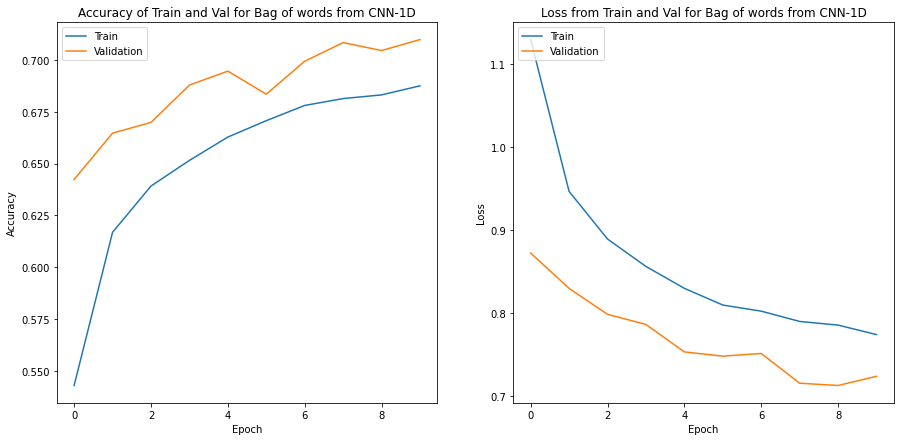

In [19]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1);
plt.plot(history_bow.history['accuracy'])
plt.plot(history_bow.history['val_accuracy'])
plt.title('Accuracy of Train and Val for Bag of words from CNN-1D')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1,2,2);
plt.plot(history_bow.history['loss'])
plt.plot(history_bow.history['val_loss'])
plt.title('Loss from Train and Val for Bag of words from CNN-1D')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Testing on test set -

In [20]:
X_test_bow = np.asarray(X_test_bows);
y_test_bow = one_hot(y_test_bows);
_, accuracy = CNN_bow.evaluate(X_test_bow, y_test_bow, batch_size=10, verbose=0);
print(accuracy)

0.7042760252952576


### Traning CNN 1D for Tf-idf - 

In [21]:
CNN_tf = MyCNN(500);

Splitting training dataset to train(80%) and validation set(20%)

In [22]:
X_train_tf, X_val_tf , y_train_tf, y_val_tf = train_test_split(X_train_tfs, y_train_tfs, test_size=0.2, stratify=y_train_tfs, random_state = 42);
print(X_train_tf.shape,X_val_tf.shape)

(30232, 500) (7559, 500)


In [23]:
y_train_tf = one_hot(y_train_tf);
y_val_tf = one_hot(y_val_tf);

In [24]:
X_train_tf = np.asarray(X_train_tf)
X_val_tf = np.asarray(X_val_tf)

Fitting - 

In [25]:
history_tf = CNN_tf.fit(X_train_tf, y_train_tf, epochs=10,batch_size = 10, validation_data=(X_val_tf, y_val_tf), verbose=2)

Epoch 1/10
3024/3024 - 12s - loss: 1.3434 - accuracy: 0.4500 - val_loss: 0.9548 - val_accuracy: 0.6109 - 12s/epoch - 4ms/step
Epoch 2/10
3024/3024 - 12s - loss: 0.9881 - accuracy: 0.6010 - val_loss: 0.8556 - val_accuracy: 0.6545 - 12s/epoch - 4ms/step
Epoch 3/10
3024/3024 - 11s - loss: 0.9013 - accuracy: 0.6390 - val_loss: 0.8014 - val_accuracy: 0.6847 - 11s/epoch - 4ms/step
Epoch 4/10
3024/3024 - 13s - loss: 0.8570 - accuracy: 0.6549 - val_loss: 0.7589 - val_accuracy: 0.6936 - 13s/epoch - 4ms/step
Epoch 5/10
3024/3024 - 11s - loss: 0.8287 - accuracy: 0.6678 - val_loss: 0.7307 - val_accuracy: 0.7035 - 11s/epoch - 4ms/step
Epoch 6/10
3024/3024 - 12s - loss: 0.8091 - accuracy: 0.6778 - val_loss: 0.7110 - val_accuracy: 0.7068 - 12s/epoch - 4ms/step
Epoch 7/10
3024/3024 - 11s - loss: 0.7920 - accuracy: 0.6819 - val_loss: 0.7308 - val_accuracy: 0.7025 - 11s/epoch - 4ms/step
Epoch 8/10
3024/3024 - 11s - loss: 0.7842 - accuracy: 0.6869 - val_loss: 0.6914 - val_accuracy: 0.7144 - 11s/epoch - 4

Plotting accuracy and loss graph for trainng and validation set-

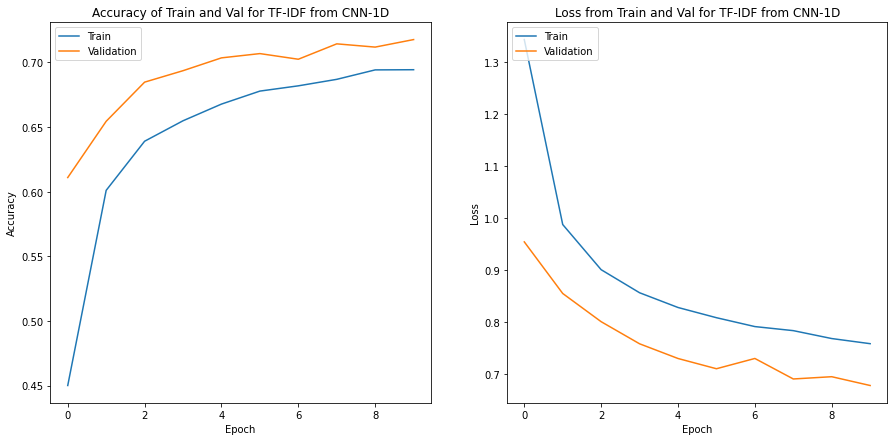

In [26]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1);
plt.plot(history_tf.history['accuracy'])
plt.plot(history_tf.history['val_accuracy'])
plt.title('Accuracy of Train and Val for TF-IDF from CNN-1D')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1,2,2);
plt.plot(history_tf.history['loss'])
plt.plot(history_tf.history['val_loss'])
plt.title('Loss from Train and Val for TF-IDF from CNN-1D')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Testing on test set -

In [27]:
X_test_tf = np.asarray(X_test_tfs);
y_test_tf = one_hot(y_test_tfs);
_, accuracy = CNN_tf.evaluate(X_test_tf, y_test_tf, batch_size=10, verbose=0);
print(accuracy);

0.7113674879074097


### Traning CNN 1D for Glove - 

In [28]:
CNN_glove = MyCNN(500);

Splitting training dataset to train(80%) and validation set(20%)

In [29]:
X_train_glove, X_val_glove , y_train_glove, y_val_glove = train_test_split(X_train_gloves, y_train_gloves, test_size=0.2, stratify=y_train_gloves, random_state = 42);
print(X_train_glove.shape,X_val_glove.shape)

(30232, 500) (7559, 500)


In [30]:
y_train_glove = one_hot(y_train_glove);
y_val_glove = one_hot(y_val_glove);

In [31]:
X_train_glove = np.asarray(X_train_glove)
X_val_glove = np.asarray(X_val_glove)

Fitting - 

In [32]:
history_glove = CNN_glove.fit(X_train_glove, y_train_glove, epochs=10,batch_size = 10, validation_data=(X_val_glove, y_val_glove), verbose=2)

Epoch 1/10
3024/3024 - 12s - loss: 0.9400 - accuracy: 0.6230 - val_loss: 0.5993 - val_accuracy: 0.7452 - 12s/epoch - 4ms/step
Epoch 2/10
3024/3024 - 11s - loss: 0.6327 - accuracy: 0.7497 - val_loss: 0.5699 - val_accuracy: 0.7736 - 11s/epoch - 4ms/step
Epoch 3/10
3024/3024 - 11s - loss: 0.5936 - accuracy: 0.7649 - val_loss: 0.5335 - val_accuracy: 0.7849 - 11s/epoch - 4ms/step
Epoch 4/10
3024/3024 - 12s - loss: 0.5731 - accuracy: 0.7713 - val_loss: 0.5237 - val_accuracy: 0.7824 - 12s/epoch - 4ms/step
Epoch 5/10
3024/3024 - 12s - loss: 0.5513 - accuracy: 0.7805 - val_loss: 0.5241 - val_accuracy: 0.7887 - 12s/epoch - 4ms/step
Epoch 6/10
3024/3024 - 11s - loss: 0.5446 - accuracy: 0.7816 - val_loss: 0.5011 - val_accuracy: 0.8000 - 11s/epoch - 4ms/step
Epoch 7/10
3024/3024 - 12s - loss: 0.5307 - accuracy: 0.7890 - val_loss: 0.4907 - val_accuracy: 0.7965 - 12s/epoch - 4ms/step
Epoch 8/10
3024/3024 - 12s - loss: 0.5206 - accuracy: 0.7909 - val_loss: 0.4946 - val_accuracy: 0.7955 - 12s/epoch - 4

Plotting accuracy and loss graph for trainng and validation set-

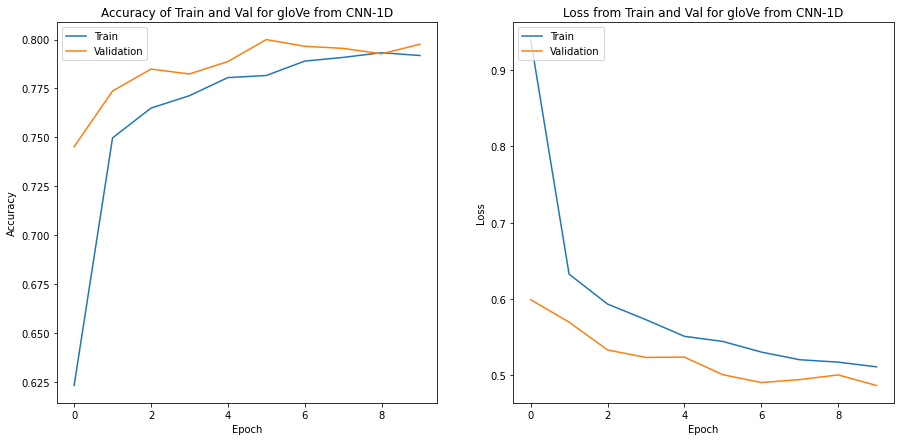

In [33]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1);
plt.plot(history_glove.history['accuracy'])
plt.plot(history_glove.history['val_accuracy'])
plt.title('Accuracy of Train and Val for gloVe from CNN-1D')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1,2,2);
plt.plot(history_glove.history['loss'])
plt.plot(history_glove.history['val_loss'])
plt.title('Loss from Train and Val for gloVe from CNN-1D')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Testing on test set -

In [34]:
X_test_glove = np.asarray(X_test_gloves);
y_test_glove = one_hot(y_test_gloves);
_, accuracy = CNN_glove.evaluate(X_test_glove, y_test_glove, batch_size=10, verbose=0);
print(accuracy);

0.7970998883247375


### Traning CNN 1D for Word2Vec - 

In [35]:
CNN_w2v = MyCNN(100);

Splitting training dataset to train(80%) and validation set(20%)

In [36]:
X_train_w2v, X_val_w2v , y_train_w2v, y_val_w2v = train_test_split(X_train_w2vs, y_train_w2vs, test_size=0.2, stratify=y_train_w2vs, random_state = 42);
print(X_train_w2v.shape,X_val_w2v.shape)

(30232, 100) (7559, 100)


In [37]:
y_train_w2v = one_hot(y_train_w2v);
y_val_w2v = one_hot(y_val_w2v);

In [38]:
X_train_w2v = np.asarray(X_train_w2v)
X_val_w2v = np.asarray(X_val_w2v)

Fitting - 

In [39]:
history_w2v = CNN_w2v.fit(X_train_w2v, y_train_w2v, epochs=10,batch_size = 10, validation_data=(X_val_w2v, y_val_w2v), verbose=2)

Epoch 1/10
3024/3024 - 13s - loss: 1.4793 - accuracy: 0.3680 - val_loss: 1.2802 - val_accuracy: 0.4596 - 13s/epoch - 4ms/step
Epoch 2/10
3024/3024 - 11s - loss: 1.3010 - accuracy: 0.4550 - val_loss: 1.2298 - val_accuracy: 0.4868 - 11s/epoch - 4ms/step
Epoch 3/10
3024/3024 - 11s - loss: 1.2592 - accuracy: 0.4775 - val_loss: 1.2116 - val_accuracy: 0.5011 - 11s/epoch - 4ms/step
Epoch 4/10
3024/3024 - 11s - loss: 1.2274 - accuracy: 0.4982 - val_loss: 1.1995 - val_accuracy: 0.5177 - 11s/epoch - 4ms/step
Epoch 5/10
3024/3024 - 11s - loss: 1.2016 - accuracy: 0.5167 - val_loss: 1.1468 - val_accuracy: 0.5371 - 11s/epoch - 4ms/step
Epoch 6/10
3024/3024 - 12s - loss: 1.1784 - accuracy: 0.5281 - val_loss: 1.1305 - val_accuracy: 0.5560 - 12s/epoch - 4ms/step
Epoch 7/10
3024/3024 - 12s - loss: 1.1641 - accuracy: 0.5375 - val_loss: 1.1246 - val_accuracy: 0.5499 - 12s/epoch - 4ms/step
Epoch 8/10
3024/3024 - 12s - loss: 1.1543 - accuracy: 0.5400 - val_loss: 1.1132 - val_accuracy: 0.5572 - 12s/epoch - 4

Plotting accuracy and loss graph for trainng and validation set-

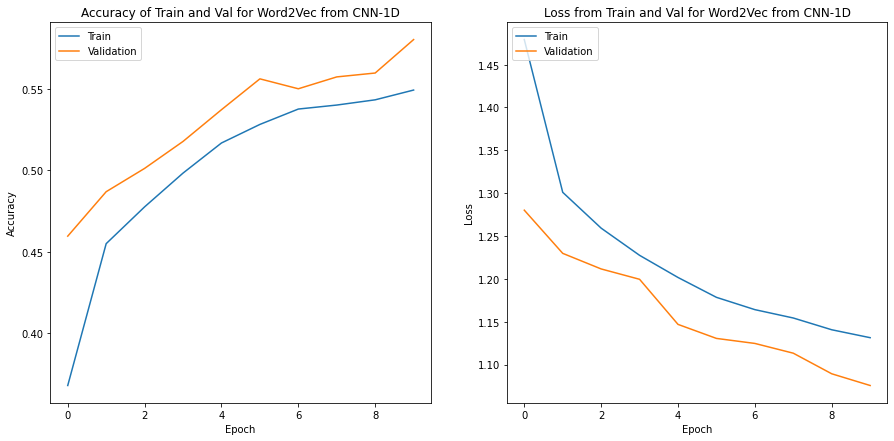

In [40]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1);
plt.plot(history_w2v.history['accuracy'])
plt.plot(history_w2v.history['val_accuracy'])
plt.title('Accuracy of Train and Val for Word2Vec from CNN-1D')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1,2,2);
plt.plot(history_w2v.history['loss'])
plt.plot(history_w2v.history['val_loss'])
plt.title('Loss from Train and Val for Word2Vec from CNN-1D')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Testing on test set -

In [41]:
X_test_w2v = np.asarray(X_test_w2vs);
y_test_w2v = one_hot(y_test_w2vs);
_, accuracy = CNN_w2v.evaluate(X_test_w2v, y_test_w2v, batch_size=10, verbose=0);
print(accuracy);

0.5796993970870972
